In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import newspaper

In [11]:
df = pd.read_csv('./newsArticlesWithLabels.tsv', sep='\t')
df.columns = [col.replace('.', '_') for col in df.columns]

In [12]:
df.head()

,url,q3,perceived,primary_topic,secondary_topic,democrat_vote,republican_vote
0,http://www.usatoday.com/story/news/nation/2013...,other,1,Civil Rights,Civil Rights,Neutral,Neutral
1,http://www.huffingtonpost.com/2013/05/21/senat...,News,0,Civil Rights,Civil Rights,Neutral,Neutral
2,http://www.washingtonpost.com/opinions/dont-le...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral
3,http://www.foxnews.com/politics/2013/04/03/oba...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral
4,http://www.breitbart.com/Big-Government/2013/1...,Opinion,1,Civil Rights,Civil Rights,Neutral,Neutral


In [13]:
df.shape

(21004, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21004 entries, 0 to 21003
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              21004 non-null  object
 1   q3               21004 non-null  object
 2   perceived        21004 non-null  int64 
 3   primary_topic    17708 non-null  object
 4   secondary_topic  6775 non-null   object
 5   democrat_vote    21004 non-null  object
 6   republican_vote  21004 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [16]:
df.democrat_vote.value_counts()

democrat_vote
Neutral             13626
SomewhatNegative     3507
SomewhatPositive     2242
Negative             1238
Positive              391
Name: count, dtype: int64

In [19]:
df.republican_vote.value_counts()

republican_vote
Neutral             15192
SomewhatNegative     3114
SomewhatPositive     1401
Negative             1073
Positive              224
Name: count, dtype: int64

<Axes: xlabel='democrat_vote'>

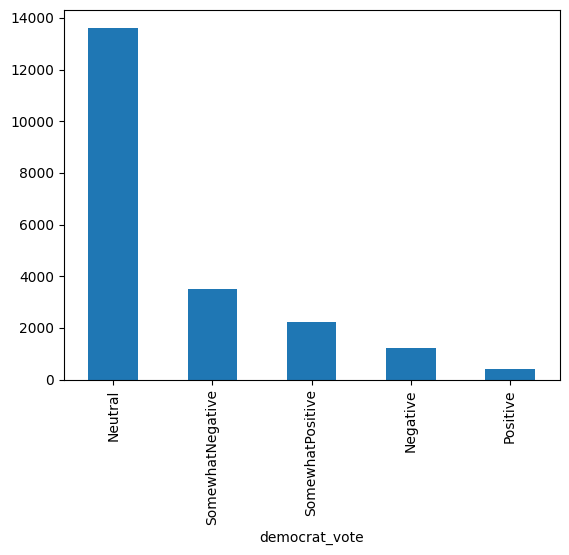

In [26]:
df.democrat_vote.value_counts().plot(kind='bar')

<Axes: xlabel='republican_vote'>

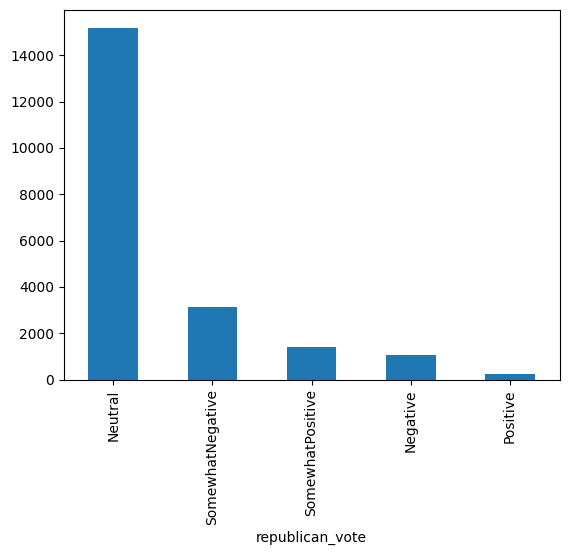

In [27]:
df.republican_vote.value_counts().plot(kind='bar')

In [28]:
df.url.head(20)

0     http://www.usatoday.com/story/news/nation/2013...
1     http://www.huffingtonpost.com/2013/05/21/senat...
2     http://www.washingtonpost.com/opinions/dont-le...
3     http://www.foxnews.com/politics/2013/04/03/oba...
4     http://www.breitbart.com/Big-Government/2013/1...
5     http://www.cnn.com/2013/06/28/politics/obama-c...
6     http://www.foxnews.com/politics/2013/10/14/ami...
7         http://www.bbc.co.uk/news/technology-22213379
8     http://www.nbcnews.com/technology/microsoft-le...
9     http://radio.foxnews.com/toddstarnes/top-stori...
10    http://www.bbc.co.uk/vietnamese/world/2013/08/...
11    http://www.usatoday.com/story/nation/2013/08/0...
12    http://www.dailykos.com/story/2013/12/02/12595...
13    http://online.wsj.com/article/SB10001424127887...
14    http://www.chicagotribune.com/news/opinion/edi...
15    http://www.nytimes.com/2013/05/24/us/politics/...
16    http://www.washingtonpost.com/local/president-...
17    http://www.latimes.com/news/local/la-me-ca

In [33]:
# grab the text from each article
def get_text(url):
    article = newspaper.Article(url, verbose=True)
    article.download()
    article.parse()
    return article.text

df['article_text'] = df.url.apply(lambda x: get_text(x))

ArticleException: Article `download()` failed with HTTPSConnectionPool(host='www.usatoday.com', port=443): Max retries exceeded with url: /story/news/nation/2013/07/15/stateline-zimmerman-stand-your-ground/2517507/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)'))) on URL http://www.usatoday.com/story/news/nation/2013/07/15/stateline-zimmerman-stand-your-ground/2517507/